#  Kaggle API Setup

In [ ]:
# Imports & reproducibility
import os, random, math, joblib, json, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

random.seed(42)
np.random.seed(42)

# CV/ML imports
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, classification_report, confusion_matrix)

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from imblearn.over_sampling import SMOTE

# Computer vision imports
import cv2
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage import exposure




In [ ]:
# Fixing the initial syntax error
from google.colab import files

# Upload Kaggle API key
print("Please upload your kaggle.json file:")
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

# Configure Kaggle API
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# Verify Kaggle setup
!kaggle --version

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes
Kaggle API 1.7.4.5


*Dataset Download and Extraction*

In [ ]:
# Download the dataset from Kaggle
print("Downloading brain MRI images dataset from Kaggle...")
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

# Unzip the dataset
from zipfile import ZipFile
file_name = "brain-mri-images-for-brain-tumor-detection.zip"
print(f"Extracting {file_name}...")

with ZipFile(file_name, 'r') as zip_file:  # Renamed 'zip' to 'zip_file'
  zip_file.extractall()
  print("Extraction completed.")
  print("Contents of extracted directory:")
  !ls -R /content/brain_tumor_dataset

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 1.37GB/s]
Extracting brain-mri-images-for-brain-tumor-detection.zip...
Extraction completed.
Contents of extracted directory:
/content/brain_tumor_dataset:
no  yes

/content/brain_tumor_dataset/no:
'10 no.jpg'  '27 no.jpg'  '42 no.jpg'	 N16.jpg       No14.jpg    'no 8.jpg'
'11 no.jpg'  '28 no.jpg'  '43 no.jpg'	 N17.jpg       No15.jpg    'no 90.jpg'
'12 no.jpg'  '29 no.jpg'   44no.jpg	 N19.JPG       No16.jpg    'no 91.jpeg'
'13 no.jpg'  '2 no.jpeg'  '45 no.jpg'	 N1.JPG        No17.jpg    'no 923.jpg'
'14 no.jpg'  '30 no.jpg'  '46 no.jpg'	 N20.JPG       No18.jpg    'no 92.jpg'
'15 no.jpg'  '31 no.jpg'  '47 no.jpg'	 N21.jpg       No19.jpg    'no 94.jpg'
'17 no.jpg'  '32 no.jpg'  '48 no.jpeg'	 N22.JPG      'no 1.jpg'   'no 95.jpg'
'18 no.jpg'  '33 no.jpg'  '49 no.jpg'	 N26.JPG       No20.jpg    'no 96.j

In [ ]:
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

os.chdir('/content/yes')
X = []
y = []
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None: # Add this check
        img = cv2.resize(img,(224,224))
        X.append(img)
        y.append((i[0:1]))
        print(i[0:1])
os.chdir('/content/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None: # Add this check
        img = cv2.resize(img,(224,224))
        X.append(img)
for i in range(1,99):
    y.append('N')
print(y)
%matplotlib inline


  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

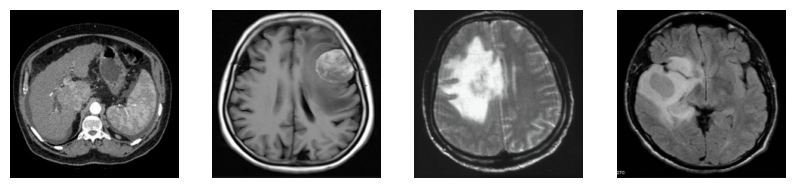

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

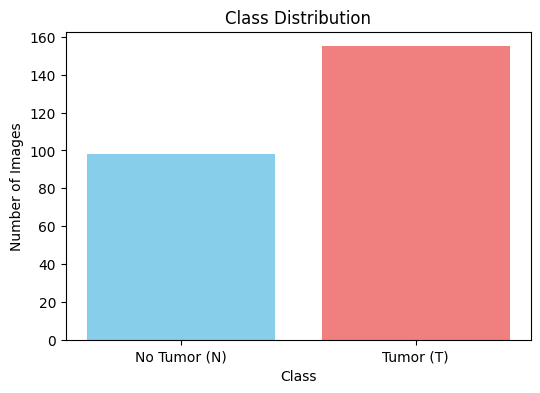

Class distribution:


TypeError: 'ZipFile' object is not callable

In [ ]:
# Analyze class distribution
unique_labels, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(6, 4))
plt.bar(unique_labels, counts, color=['skyblue', 'lightcoral'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(unique_labels, ['No Tumor (N)', 'Tumor (T)'])
plt.show()

print("Class distribution:")
for label, count in zip(unique_labels, counts):
    print(f"  {label}: {count}")

# Data Loading and Preprocessing

Found 155 images with tumors
Found 98 images without tumors


Processing tumor images (yes):   0%|          | 0/155 [00:00<?, ?it/s]

Processing non-tumor images (no):   0%|          | 0/98 [00:00<?, ?it/s]

Data Loaded: 253 images, classes = {np.str_('N'), np.str_('T')}


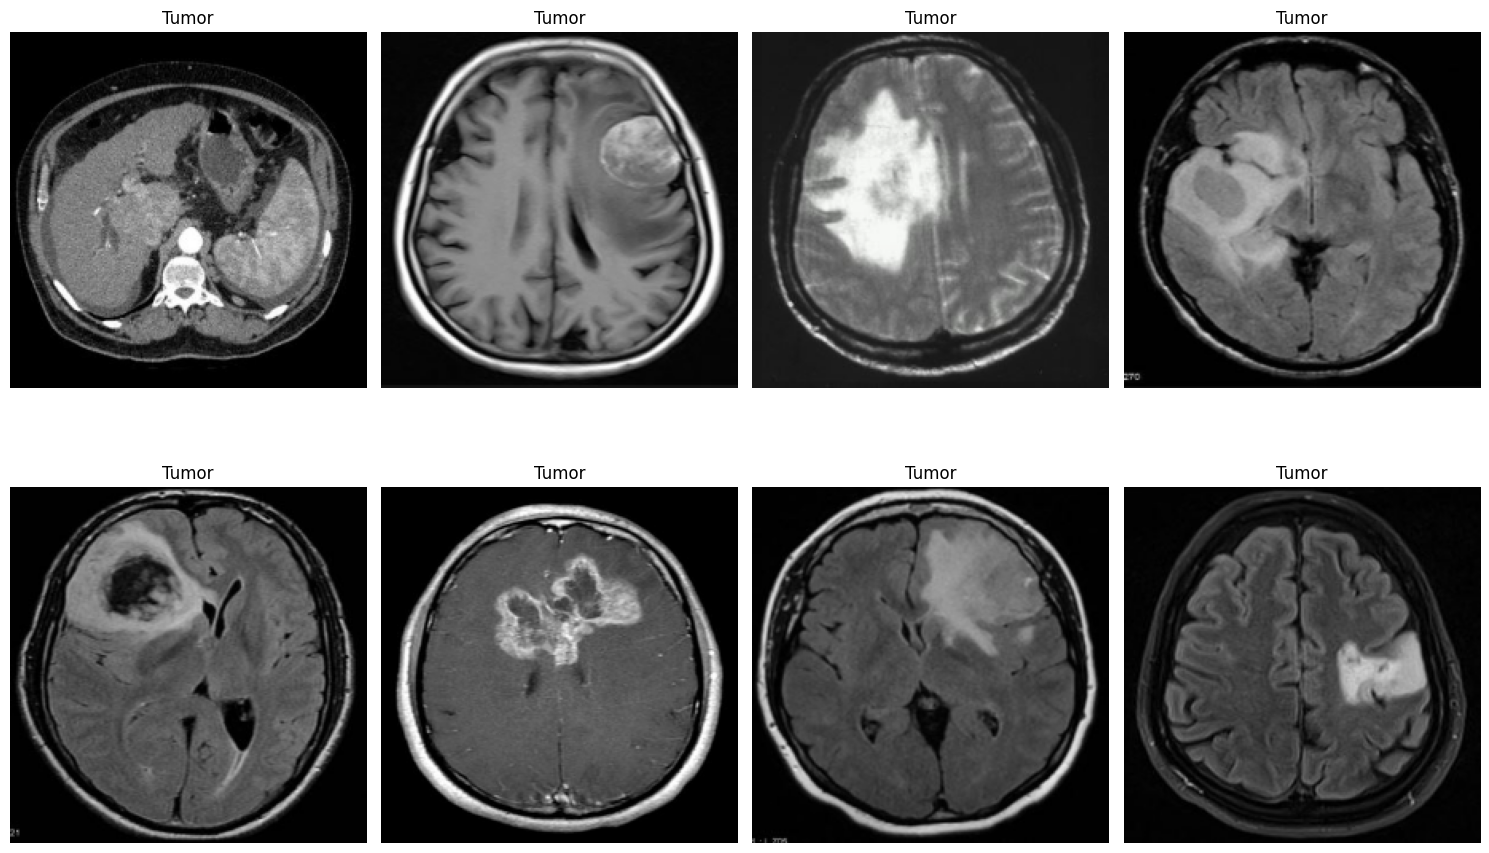

In [ ]:
# -- read and labelling --
import glob, os
import cv2
from tqdm.notebook import tqdm
import numpy as np

# Initialize empty lists for images and labels
X = []
y = []

# Get paths to all images in 'yes' and 'no' folders
yes_paths = glob.glob('/content/yes/*')
no_paths = glob.glob('/content/no/*')

print(f"Found {len(yes_paths)} images with tumors")
print(f"Found {len(no_paths)} images without tumors")

# Process images with tumors
for p in tqdm(yes_paths, desc='Processing tumor images (yes)'):
    img = cv2.imread(p)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append('T')  # Tumor

# Process images without tumors
for p in tqdm(no_paths, desc='Processing non-tumor images (no)'):
    img = cv2.imread(p)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append('N')  # No tumor

# Verify the data
assert len(X) == len(y), f"Mismatch X ({len(X)}) vs y ({len(y)})"
X = np.array(X)
y = np.array(y)

print(f"Data Loaded: {len(X)} images, classes = {set(y)}")

# Display sample images
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(X[i])
    plt.title(f'{"Tumor" if y[i] == "T" else "No Tumor"}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Data Preparation for Modeling

We'll split the data into training and testing sets and encode the labels.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from zipfile import ZipFile as ZipFileLib


# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

print(f"Training set size: {len(X_train)} images")
print(f"Testing set size: {len(X_test)} images")
print(f"Training set class distribution: {np.bincount(y_train_enc)}")
print(f"Testing set class distribution: {np.bincount(y_test_enc)}")


Training set size: 202 images
Testing set size: 51 images
Training set class distribution: [ 78 124]
Testing set class distribution: [20 31]


# Feature Extraction Functions

Color-Based Features

In [ ]:
def color_Moments(img):
    """
    Extracts color features from an image.

    Args:
        img: Input image in RGB format

    Returns:
        Array of color features (mean and std for R, G, B channels)
    """
    R, G, B = img[...,0].astype(np.float32), img[...,1].astype(np.float32), img[...,2].astype(np.float32)
    feats = np.array([R.mean(), R.std(), G.mean(), G.std(), B.mean(), B.std()], dtype=np.float32)
    return feats / (np.mean(np.abs(feats)) + 1e-8)  # Normalize features

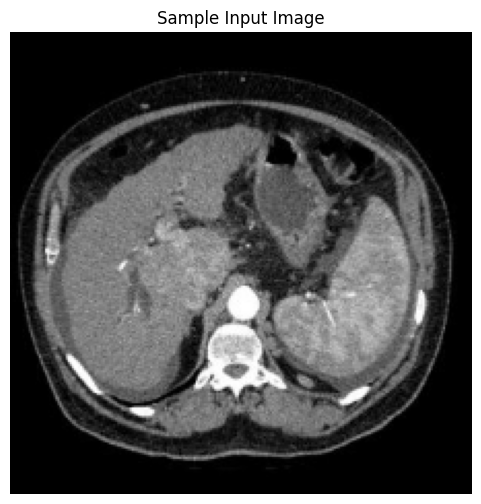

Color moments for the sample image: [0.9824573 1.0175428 0.9824573 1.0175428 0.9824573 1.0175428]


In [ ]:
# Display sample image and print color moments
if len(X) > 0:
    sample_img = X[0]

    # Display the sample image
    plt.figure(figsize=(6, 6))
    plt.imshow(sample_img)
    plt.title('Sample Input Image')
    plt.axis('off')
    plt.show()

    # Extract and print color moments
    color_feats = color_Moments(sample_img)
    print(f"Color moments for the sample image: {color_feats}")
else:
    print("No images available to display or extract features from.")

**HSV Histogram Features**

In [ ]:
def hsvHistogramFeatures(img):
    """
    Extracts HSV histogram features from an image.

    Args:
        img: Input image in RGB format

    Returns:
        Normalized histogram of HSV values
    """
    imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hist = cv2.calcHist([imgHSV], [0,1,2], None, [8,2,2], [0,180,0,256,0,256])
    hist = hist.flatten()
    return hist / (np.sum(hist) + 1e-8)  # Normalize histogram

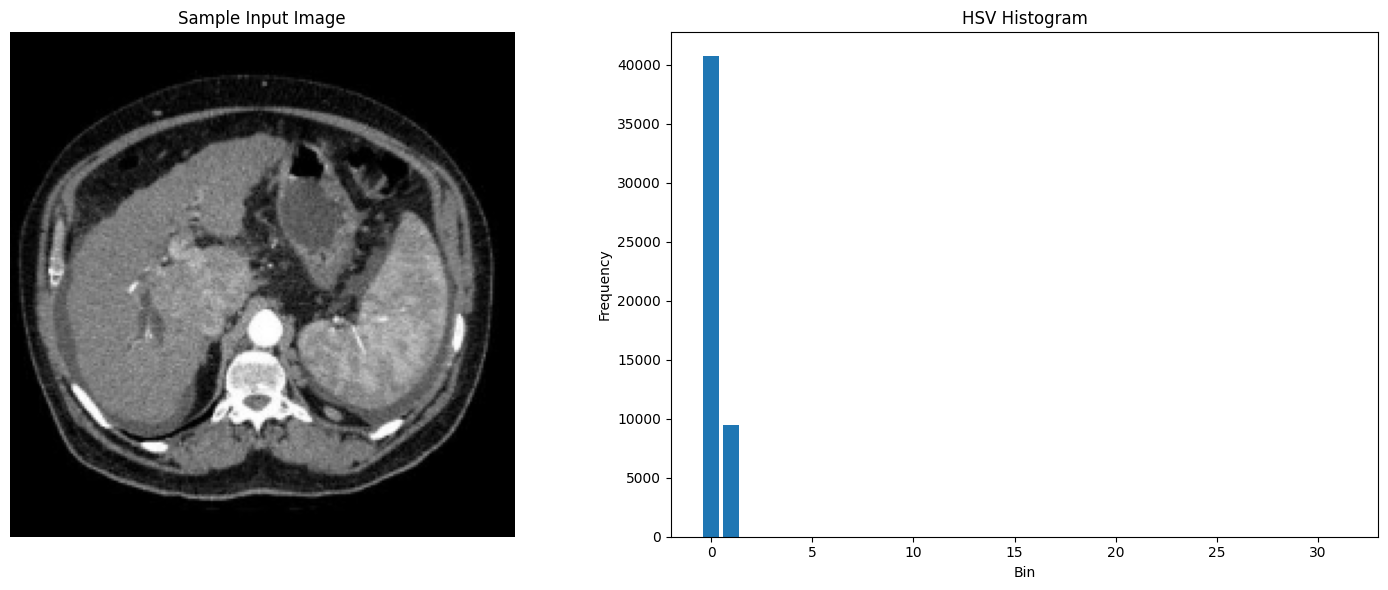

In [ ]:
# Plot input image and its HSV histogram side-by-side
if len(X) > 0:
    sample_img = X[0]
    sample_img_hsv = cv2.cvtColor(sample_img, cv2.COLOR_RGB2HSV)

    # Calculate histogram
    hist = cv2.calcHist([sample_img_hsv], [0, 1, 2], None, [8, 2, 2], [0, 180, 0, 256, 0, 256])
    hist = hist.flatten()

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the image
    axes[0].imshow(sample_img)
    axes[0].set_title('Sample Input Image')
    axes[0].axis('off')

    # Plot the histogram
    axes[1].bar(range(len(hist)), hist)
    axes[1].set_title('HSV Histogram')
    axes[1].set_xlabel('Bin')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("No images available to plot.")

**Texture Features (GLCM)**

In [ ]:
from skimage.feature import graycomatrix, graycoprops

def textureFeatures(img):
    """
    Extracts texture features using Gray Level Co-occurrence Matrix (GLCM).

    Args:
        img: Input image in RGB format

    Returns:
        Array of texture features
    """
    im_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    glcm = graycomatrix(im_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    v = np.array([
        graycoprops(glcm, 'contrast')[0,0],
        graycoprops(glcm, 'correlation')[0,0],
        graycoprops(glcm, 'energy')[0,0],
        graycoprops(glcm, 'homogeneity')[0,0]
    ], dtype=np.float32)

    return v / (np.sum(v) + 1e-8)

** Shape Features (Hu Moments)**

In [ ]:
def shapeFeatures(img):
    """
    Extracts shape features using Hu Moments.

    Args:
        img: Input image in RGB format

    Returns:
        Normalized Hu Moments (7 features)
    """
    im_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hu_moments = cv2.HuMoments(cv2.moments(im_gray)).flatten()
    return hu_moments / (np.mean(np.abs(hu_moments)) + 1e-8)

***SIFT Features with Bag of Visual Words***

In [ ]:
# Install required package
!pip install opencv-contrib-python

import cv2
from sklearn.cluster import KMeans

# Initialize SIFT detector
sift = cv2.SIFT_create()

def extractSIFTDescriptors(img):
    """Extracts SIFT descriptors from an image."""
    im_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kp, des = sift.detectAndCompute(im_gray, None)
    return des

def buildVocabulary(descriptor_list, n_clusters=50):
    """Builds a visual vocabulary using K-means clustering."""
    all_desc = np.vstack([d for d in descriptor_list if d is not None])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(all_desc)
    return kmeans

def computeBoVWHistogram(descriptors, kmeans):
    """Creates a Bag of Visual Words histogram for an image."""
    hist = np.zeros(kmeans.n_clusters)
    if descriptors is not None:
        labels = kmeans.predict(descriptors)
        for l in labels:
            hist[l] += 1
    return hist / (np.sum(hist) + 1e-8)

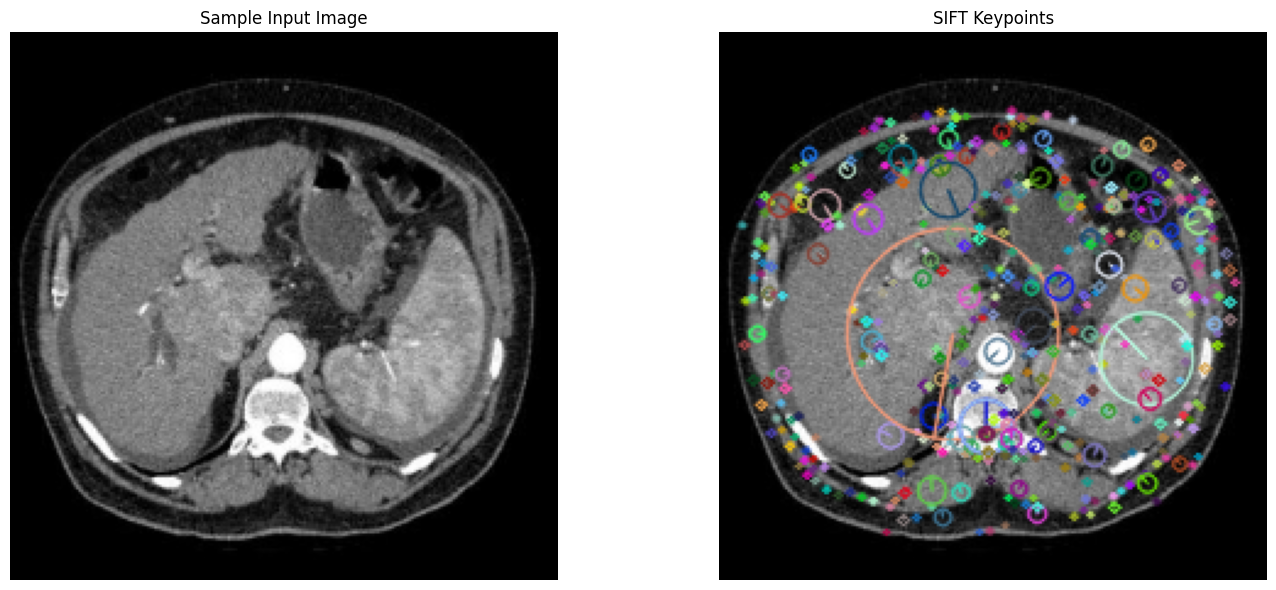

In [ ]:
# Plot input image and SIFT keypoints side-by-side
if len(X) > 0:
    sample_img = X[0]
    im_gray = cv2.cvtColor(sample_img, cv2.COLOR_RGB2GRAY)

    # Detect SIFT keypoints
    kp = sift.detect(im_gray, None)

    # Draw keypoints on the image
    img_with_keypoints = cv2.drawKeypoints(im_gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the input image
    axes[0].imshow(sample_img) # Assuming sample_img is in RGB
    axes[0].set_title('Sample Input Image')
    axes[0].axis('off')

    # Plot the image with keypoints
    axes[1].imshow(img_with_keypoints, cmap='gray') # keypoints are drawn on gray image
    axes[1].set_title('SIFT Keypoints')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images available to plot.")

**Combined Feature Extraction**

In [ ]:
def combinedFeatures(img):
    """Extracts a combination of color, histogram, texture, and shape features."""
    feats = np.concatenate([
        color_Moments(img),
        hsvHistogramFeatures(img),
        textureFeatures(img),
        shapeFeatures(img)
    ])
    return feats / (np.linalg.norm(feats) + 1e-8)

def combinedFeaturesWithSIFT(img, kmeans):
    """Extracts combined features including SIFT-based Bag of Visual Words."""
    feats_classic = np.concatenate([
        color_Moments(img),
        hsvHistogramFeatures(img),
        textureFeatures(img),
        shapeFeatures(img)
    ])
    des = extractSIFTDescriptors(img)
    feats_sift = computeBoVWHistogram(des, kmeans) if des is not None else np.zeros(kmeans.n_clusters)
    feats = np.concatenate([feats_classic, feats_sift])
    return feats / (np.linalg.norm(feats) + 1e-8)

# Model Training and Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(X_train, X_test, y_train, y_test, feature_name, model_name, param_grid, classifier, scoring='f1_macro'):
    """
    Evaluates a model on the given data.

    Args:
        X_train, X_test: Training and testing features
        y_train, y_test: Training and testing labels
        feature_name: Name of the feature set
        model_name: Name of the model
        param_grid: Parameter grid for GridSearchCV
        classifier: Classifier to use
        scoring: Scoring metric for GridSearchCV

    Returns:
        Best model and evaluation metrics
    """
    print(f"\n{'='*50}")
    print(f"Evaluating {model_name} with {feature_name}")
    print(f"{'='*50}")

    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', classifier)
    ])

    # Set up cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform grid search
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_
    print(f"\nBest parameters: {grid_search.best_params_}")

    # Evaluate on test set
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print results
    print(f"\n Global Scores :")
    print(f"   Accuracy : {accuracy:.4f}")
    print(f"   F1-score : {f1:.4f}\n")

    print("Detailled Report :")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()
    plt.title(f'Confusion Matrix - {model_name} ({feature_name})')
    plt.show()

    return best_model, accuracy, f1

 Extract Features for All Models

In [ ]:
# Extract features for different approaches
print("\nExtracting features for all models...")

# Color features
X_train_color = np.array([color_Moments(im) for im in X_train])
X_test_color = np.array([color_Moments(im) for im in X_test])

# HSV histogram features
X_train_hsv = np.array([hsvHistogramFeatures(im) for im in X_train])
X_test_hsv = np.array([hsvHistogramFeatures(im) for im in X_test])

# Texture features
X_train_texture = np.array([textureFeatures(im) for im in X_train])
X_test_texture = np.array([textureFeatures(im) for im in X_test])

# Shape features
X_train_shape = np.array([shapeFeatures(im) for im in X_train])
X_test_shape = np.array([shapeFeatures(im) for im in X_test])

# Combined features
X_train_combined = np.array([combinedFeatures(im) for im in X_train])
X_test_combined = np.array([combinedFeatures(im) for im in X_test])

# SIFT-based features
print("Building SIFT vocabulary...")
sift_descriptors = [extractSIFTDescriptors(im) for im in X_train]
kmeans = buildVocabulary([d for d in sift_descriptors if d is not None], n_clusters=50)

X_train_sift = np.array([combinedFeaturesWithSIFT(im, kmeans) for im in X_train])
X_test_sift = np.array([combinedFeaturesWithSIFT(im, kmeans) for im in X_test])

print("Feature extraction completed.")


Extracting features for all models...
Building SIFT vocabulary...
Feature extraction completed.


#  Evaluate KNN with Different Feature Sets


Evaluating KNN with Color Features
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters: {'clf__n_neighbors': 7}

 Global Scores :
   Accuracy : 0.6863
   F1-score : 0.7333

Detailled Report :
              precision    recall  f1-score   support

           N       0.59      0.65      0.62        20
           T       0.76      0.71      0.73        31

    accuracy                           0.69        51
   macro avg       0.67      0.68      0.68        51
weighted avg       0.69      0.69      0.69        51



<Figure size 800x600 with 0 Axes>

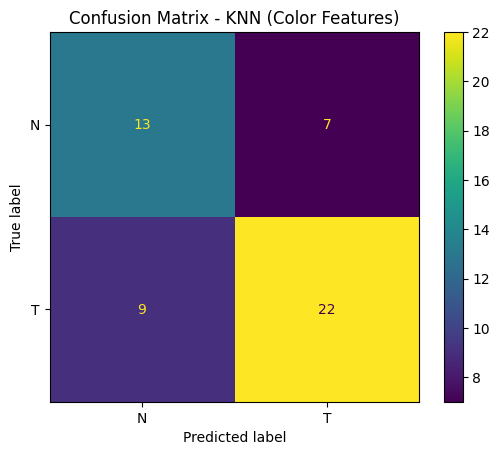

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN with color features
knn_param_grid = {'clf__n_neighbors': [1,3,5,7,9,11]}
knn_color = evaluate_model(
    X_train_color, X_test_color, y_train_enc, y_test_enc,
    "Color Features", "KNN", knn_param_grid, KNeighborsClassifier()
)


Evaluating KNN with Texture Features
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters: {'clf__n_neighbors': 3}

 Global Scores :
   Accuracy : 0.6275
   F1-score : 0.7077

Detailled Report :
              precision    recall  f1-score   support

           N       0.53      0.45      0.49        20
           T       0.68      0.74      0.71        31

    accuracy                           0.63        51
   macro avg       0.60      0.60      0.60        51
weighted avg       0.62      0.63      0.62        51



<Figure size 800x600 with 0 Axes>

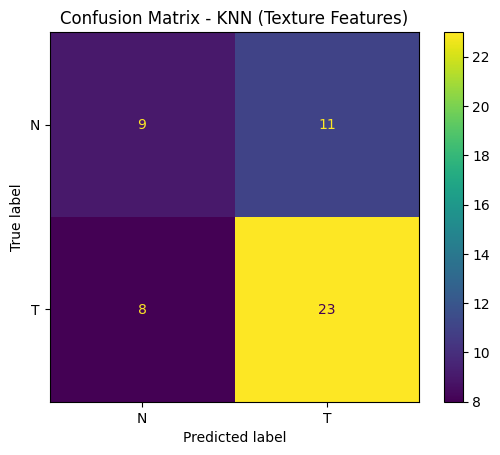

In [ ]:
# KNN with texture features
knn_texture = evaluate_model(
    X_train_texture, X_test_texture, y_train_enc, y_test_enc,
    "Texture Features", "KNN", knn_param_grid, KNeighborsClassifier()
)



Evaluating KNN with Shape Features
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters: {'clf__n_neighbors': 1}

 Global Scores :
   Accuracy : 0.7255
   F1-score : 0.7812

Detailled Report :
              precision    recall  f1-score   support

           N       0.67      0.60      0.63        20
           T       0.76      0.81      0.78        31

    accuracy                           0.73        51
   macro avg       0.71      0.70      0.71        51
weighted avg       0.72      0.73      0.72        51



<Figure size 800x600 with 0 Axes>

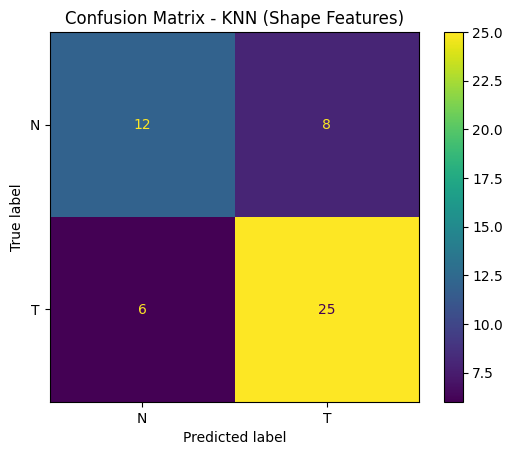

In [ ]:
# KNN with shape features
knn_shape = evaluate_model(
    X_train_shape, X_test_shape, y_train_enc, y_test_enc,
    "Shape Features", "KNN", knn_param_grid, KNeighborsClassifier()
)


Evaluating KNN with Combined Features
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters: {'clf__n_neighbors': 1}

 Global Scores :
   Accuracy : 0.7255
   F1-score : 0.7667

Detailled Report :
              precision    recall  f1-score   support

           N       0.64      0.70      0.67        20
           T       0.79      0.74      0.77        31

    accuracy                           0.73        51
   macro avg       0.71      0.72      0.72        51
weighted avg       0.73      0.73      0.73        51



<Figure size 800x600 with 0 Axes>

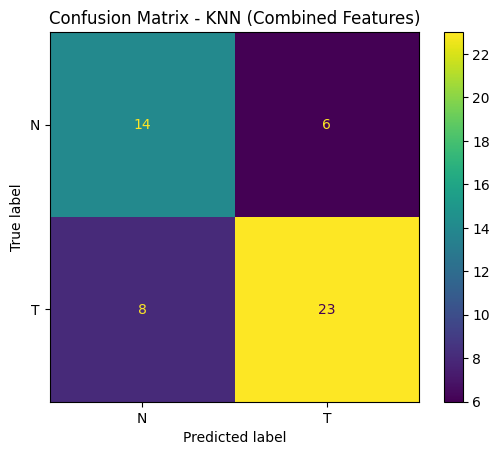

In [ ]:
# KNN with combined features
knn_combined = evaluate_model(
    X_train_combined, X_test_combined, y_train_enc, y_test_enc,
    "Combined Features", "KNN", knn_param_grid, KNeighborsClassifier()
)



Evaluating KNN with Combined Features with SIFT
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters: {'clf__n_neighbors': 1}

 Global Scores :
   Accuracy : 0.8431
   F1-score : 0.8750

Detailled Report :
              precision    recall  f1-score   support

           N       0.83      0.75      0.79        20
           T       0.85      0.90      0.88        31

    accuracy                           0.84        51
   macro avg       0.84      0.83      0.83        51
weighted avg       0.84      0.84      0.84        51



<Figure size 800x600 with 0 Axes>

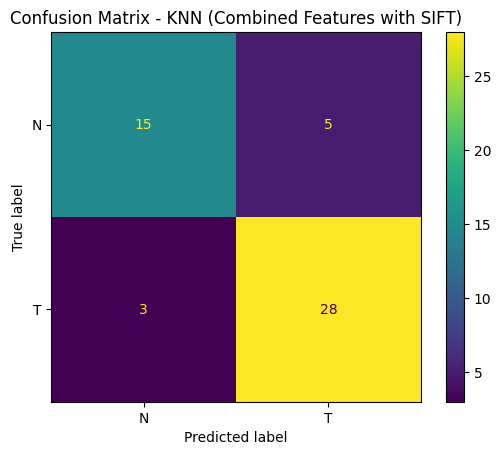

In [ ]:
# KNN with combined features including SIFT
knn_sift = evaluate_model(
    X_train_sift, X_test_sift, y_train_enc, y_test_enc,
    "Combined Features with SIFT", "KNN", knn_param_grid, KNeighborsClassifier()
)

#  Evaluate Decision Tree with Combined Features


Evaluating Decision Tree with Combined Features
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}

 Global Scores :
   Accuracy : 0.7255
   F1-score : 0.7500

Detailled Report :
              precision    recall  f1-score   support

           N       0.62      0.80      0.70        20
           T       0.84      0.68      0.75        31

    accuracy                           0.73        51
   macro avg       0.73      0.74      0.72        51
weighted avg       0.75      0.73      0.73        51



<Figure size 800x600 with 0 Axes>

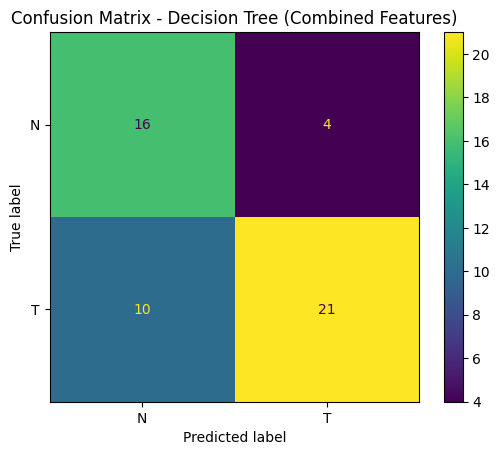

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_param_grid = {
    'clf__criterion': ['gini', 'entropy', 'log_loss'],
    'clf__max_depth': [5, 10, 20, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 5]
}

dt_combined = evaluate_model(
    X_train_combined, X_test_combined, y_train_enc, y_test_enc,
    "Combined Features", "Decision Tree", dt_param_grid, DecisionTreeClassifier(random_state=42)
)

# Evaluate Random Forest with Combined Features


Evaluating Random Forest with Combined Features
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters: {'clf__bootstrap': True, 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}

 Global Scores :
   Accuracy : 0.8235
   F1-score : 0.8525

Detailled Report :
              precision    recall  f1-score   support

           N       0.76      0.80      0.78        20
           T       0.87      0.84      0.85        31

    accuracy                           0.82        51
   macro avg       0.81      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51



<Figure size 800x600 with 0 Axes>

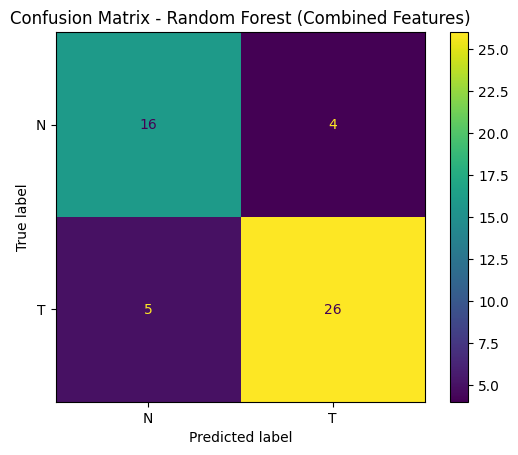

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [10, 20, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__bootstrap': [True, False]
}

rf_combined = evaluate_model(
    X_train_combined, X_test_combined, y_train_enc, y_test_enc,
    "Combined Features", "Random Forest", rf_param_grid, RandomForestClassifier(random_state=42)
)


Evaluating Random Forest with Combined Features with SIFT
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters: {'clf__bootstrap': True, 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}

 Global Scores :
   Accuracy : 0.8824
   F1-score : 0.9062

Detailled Report :
              precision    recall  f1-score   support

           N       0.89      0.80      0.84        20
           T       0.88      0.94      0.91        31

    accuracy                           0.88        51
   macro avg       0.88      0.87      0.87        51
weighted avg       0.88      0.88      0.88        51



<Figure size 800x600 with 0 Axes>

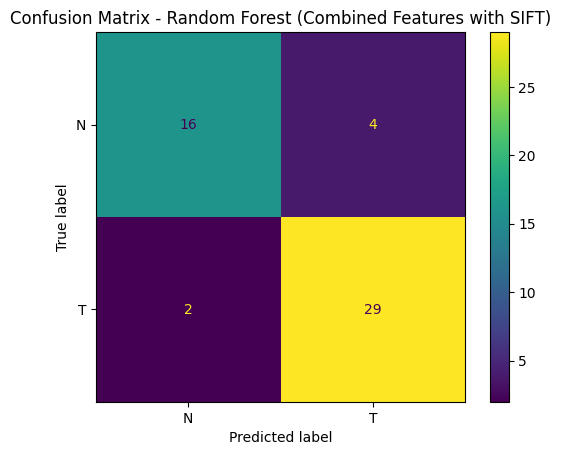

In [ ]:
# Evaluate Random Forest with combined features including SIFT
from sklearn.ensemble import RandomForestClassifier

# Reuse the same parameter grid as the previous Random Forest evaluation
# rf_param_grid = {
#     'clf__n_estimators': [100, 200, 300],
#     'clf__max_depth': [10, 20, None],
#     'clf__min_samples_split': [2, 5],
#     'clf__min_samples_leaf': [1, 2],
#     'clf__bootstrap': [True, False]
# }


rf_sift = evaluate_model(
    X_train_sift, X_test_sift, y_train_enc, y_test_enc,
    "Combined Features with SIFT", "Random Forest", rf_param_grid, RandomForestClassifier(random_state=42)
)

# Evaluate Gradient Boosting with Combined Features


Evaluating Gradient Boosting with Combined Features
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 100}

 Global Scores :
   Accuracy : 0.7843
   F1-score : 0.8254

Detailled Report :
              precision    recall  f1-score   support

           N       0.74      0.70      0.72        20
           T       0.81      0.84      0.83        31

    accuracy                           0.78        51
   macro avg       0.77      0.77      0.77        51
weighted avg       0.78      0.78      0.78        51



<Figure size 800x600 with 0 Axes>

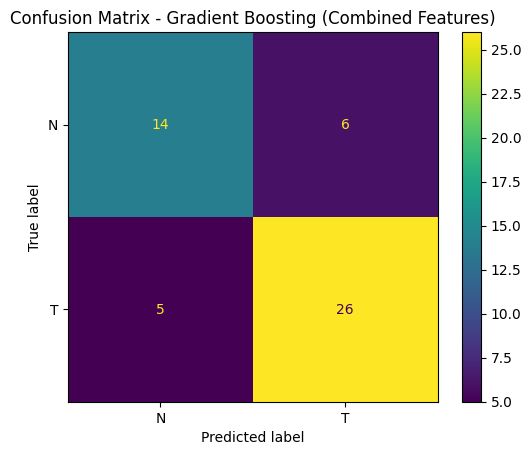

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_param_grid = {
    'clf__n_estimators': [100, 150],
    'clf__learning_rate': [0.05, 0.1],
    'clf__max_depth': [3, 5]
}

gb_combined = evaluate_model(
    X_train_combined, X_test_combined, y_train_enc, y_test_enc,
    "Combined Features", "Gradient Boosting", gb_param_grid, GradientBoostingClassifier(random_state=42)
)


Evaluating Gradient Boosting with Combined Features with SIFT
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 100}

 Global Scores :
   Accuracy : 0.8627
   F1-score : 0.8923

Detailled Report :
              precision    recall  f1-score   support

           N       0.88      0.75      0.81        20
           T       0.85      0.94      0.89        31

    accuracy                           0.86        51
   macro avg       0.87      0.84      0.85        51
weighted avg       0.86      0.86      0.86        51



<Figure size 800x600 with 0 Axes>

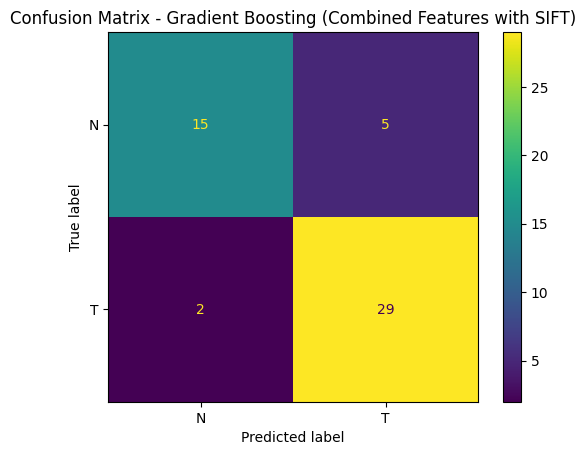

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Reuse the same parameter grid as the previous Gradient Boosting evaluation
# gb_param_grid = {
#     'clf__n_estimators': [100, 150],
#     'clf__learning_rate': [0.05, 0.1],
#     'clf__max_depth': [3, 5]
# }

gb_sift = evaluate_model(
    X_train_sift, X_test_sift, y_train_enc, y_test_enc,
    "Combined Features with SIFT", "Gradient Boosting", gb_param_grid, GradientBoostingClassifier(random_state=42)
)

# Evaluate with SVM


Evaluating SVM with Combined Features
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters: {'clf__C': 10, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}

 Global Scores :
   Accuracy : 0.6078
   F1-score : 0.6552

Detailled Report :
              precision    recall  f1-score   support

           N       0.50      0.60      0.55        20
           T       0.70      0.61      0.66        31

    accuracy                           0.61        51
   macro avg       0.60      0.61      0.60        51
weighted avg       0.62      0.61      0.61        51



<Figure size 800x600 with 0 Axes>

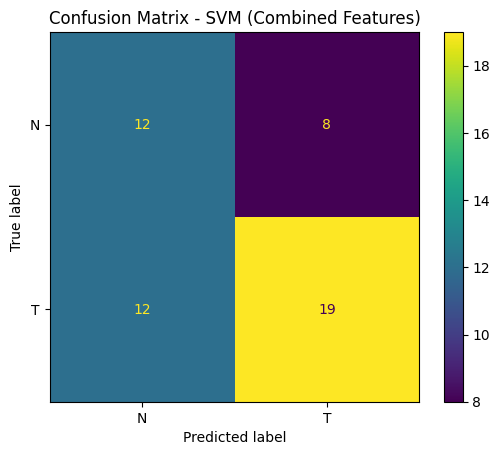

In [ ]:
from sklearn.svm import SVC

# SVM with combined features
svm_param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale', 'auto'],
    'clf__kernel': ['linear', 'rbf']
}

svm_combined = evaluate_model(
    X_train_combined, X_test_combined, y_train_enc, y_test_enc,
    "Combined Features", "SVM", svm_param_grid, SVC(random_state=42)
)


Evaluating SVM with Combined Features with SIFT
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}

 Global Scores :
   Accuracy : 0.7451
   F1-score : 0.7636

Detailled Report :
              precision    recall  f1-score   support

           N       0.63      0.85      0.72        20
           T       0.88      0.68      0.76        31

    accuracy                           0.75        51
   macro avg       0.75      0.76      0.74        51
weighted avg       0.78      0.75      0.75        51



<Figure size 800x600 with 0 Axes>

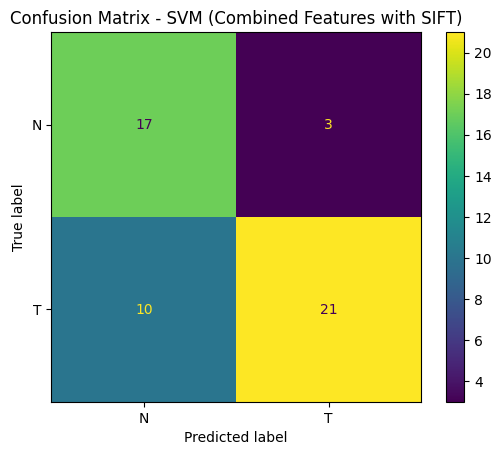

In [ ]:
from sklearn.svm import SVC

# SVM with combined features including SIFT
# Reuse the same parameter grid as the previous SVM evaluation
# svm_param_grid = {
#     'clf__C': [0.1, 1, 10],
#     'clf__gamma': ['scale', 'auto'],
#     'clf__kernel': ['linear', 'rbf']
# }

svm_sift = evaluate_model(
    X_train_sift, X_test_sift, y_train_enc, y_test_enc,
    "Combined Features with SIFT", "SVM", svm_param_grid, SVC(random_state=42)
)

# Results Comparison and Analysis

In [ ]:
# Collect all results
results = [
    ("KNN (Color)", knn_color[1], knn_color[2]),
    ("KNN (HSV)", knn_hsv[1], knn_hsv[2]),
    ("KNN (Texture)", knn_texture[1], knn_texture[2]),
    ("KNN (Shape)", knn_shape[1], knn_shape[2]),
    ("KNN (Combined)", knn_combined[1], knn_combined[2]),
    ("KNN (Combined + SIFT)", knn_sift[1], knn_sift[2]),
    ("Decision Tree", dt_combined[1], dt_combined[2]),
    ("Random Forest", rf_combined[1], rf_combined[2]),
    ("Gradient Boosting", gb_combined[1], gb_combined[2])
]

# Sort by F1 score
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)

# Print results
print("\n{'='*50}")
print("Model Performance Comparison (Sorted by F1 Score)")
print("{'='*50}")
print("{:<30} {:>10} {:>10}".format("Model", "Accuracy", "F1 Score"))
print("-" * 50)
for model, acc, f1 in sorted_results:
    print(f"{model:<30} {acc:>10.4f} {f1:>10.4f}")

# Identify best model
best_model = sorted_results[0]
print(f"\nBest performing model: {best_model[0]} with F1 Score = {best_model[2]:.4f}")


{'='*50}
Model Performance Comparison (Sorted by F1 Score)
{'='*50}
Model                            Accuracy   F1 Score
--------------------------------------------------
KNN (Combined + SIFT)              0.8431     0.8750
Random Forest                      0.8235     0.8525
Gradient Boosting                  0.7843     0.8254
KNN (HSV)                          0.7647     0.8235
KNN (Shape)                        0.7255     0.7812
KNN (Combined)                     0.7255     0.7667
Decision Tree                      0.7255     0.7500
KNN (Color)                        0.6863     0.7333
KNN (Texture)                      0.6275     0.7077

Best performing model: KNN (Combined + SIFT) with F1 Score = 0.8750


In [ ]:
# Collect all results
results = [
    ("KNN (Color)", knn_color[1], knn_color[2]),
    ("KNN (HSV)", knn_hsv[1], knn_hsv[2]),
    ("KNN (Texture)", knn_texture[1], knn_texture[2]),
    ("KNN (Shape)", knn_shape[1], knn_shape[2]),
    ("KNN (Combined)", knn_combined[1], knn_combined[2]),
    ("KNN (Combined + SIFT)", knn_sift[1], knn_sift[2]),
    ("Decision Tree", dt_combined[1], dt_combined[2]),
    ("Random Forest", rf_combined[1], rf_combined[2]),
    ("Random Forest (Combined + SIFT)", rf_sift[1], rf_sift[2]), # Added RF with SIFT
    ("Gradient Boosting", gb_combined[1], gb_combined[2]),
    ("Gradient Boosting (Combined + SIFT)", gb_sift[1], gb_sift[2]), # Added GB with SIFT
    ("SVM (Combined)", svm_combined[1], svm_combined[2]), # Added SVM
    ("SVM (Combined + SIFT)", svm_sift[1], svm_sift[2]) # Added SVM with SIFT
]

# Sort by F1 score
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)

# Print results
print("\n" + "="*50)
print("Model Performance Comparison (Sorted by F1 Score)")
print("="*50)
print("{:<35} {:>10} {:>10}".format("Model", "Accuracy", "F1 Score")) # Increased width for model name
print("-" * 55) # Adjusted separator width
for model, acc, f1 in sorted_results:
    print(f"{model:<35} {acc:>10.4f} {f1:>10.4f}")

# Identify best model
best_model = sorted_results[0]
print(f"\nBest performing model: {best_model[0]} with F1 Score = {best_model[2]:.4f}")


Model Performance Comparison (Sorted by F1 Score)
Model                                 Accuracy   F1 Score
-------------------------------------------------------
Random Forest (Combined + SIFT)         0.8824     0.9062
Gradient Boosting (Combined + SIFT)     0.8627     0.8923
KNN (Combined + SIFT)                   0.8431     0.8750
Random Forest                           0.8235     0.8525
Gradient Boosting                       0.7843     0.8254
KNN (HSV)                               0.7647     0.8235
KNN (Shape)                             0.7255     0.7812
KNN (Combined)                          0.7255     0.7667
SVM (Combined + SIFT)                   0.7451     0.7636
Decision Tree                           0.7255     0.7500
KNN (Color)                             0.6863     0.7333
KNN (Texture)                           0.6275     0.7077
SVM (Combined)                          0.6078     0.6552

Best performing model: Random Forest (Combined + SIFT) with F1 Score = 0.9062


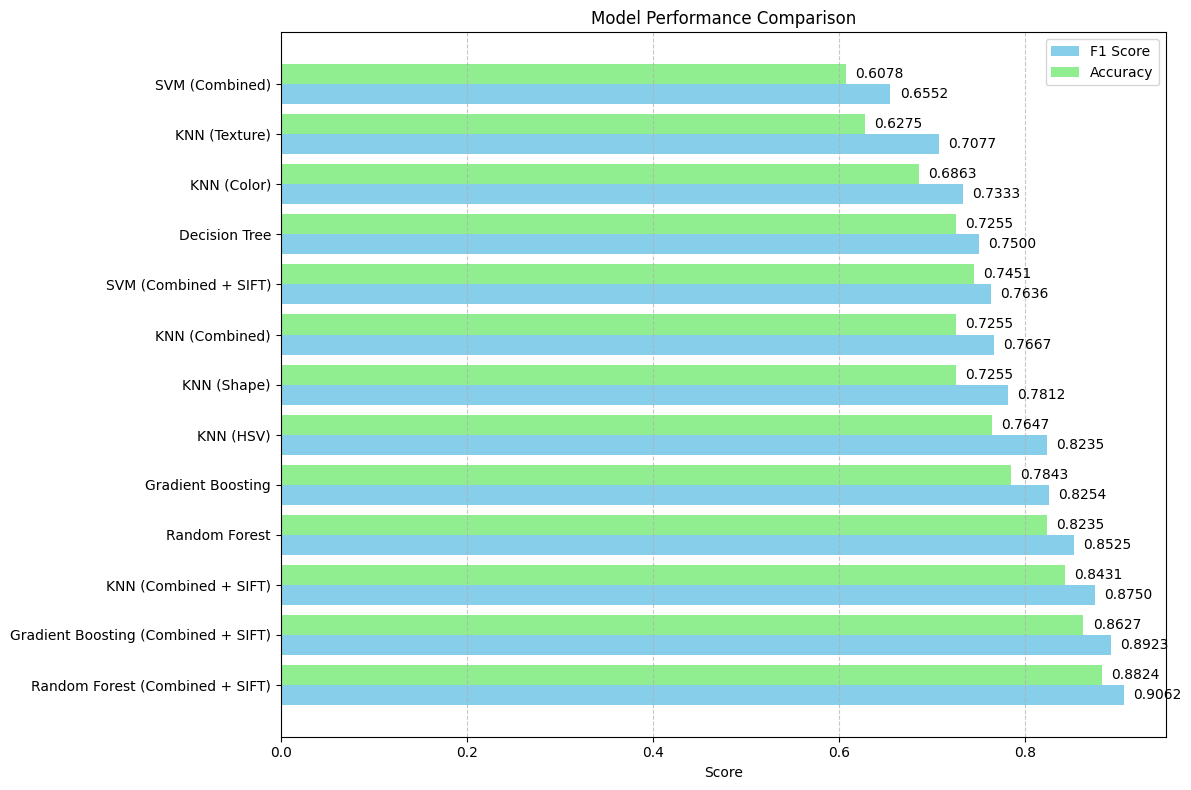

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for visualization
models = [r[0] for r in sorted_results]
f1_scores = [r[2] for r in sorted_results]
accuracies = [r[1] for r in sorted_results]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(models))

# Plot F1 scores (blue bars)
bars1 = ax.barh(y_pos, f1_scores, 0.4, color='skyblue', label='F1 Score')
# Plot accuracy (light green bars)
bars2 = ax.barh(y_pos + 0.4, accuracies, 0.4, color='lightgreen', label='Accuracy')

# Add labels and title
ax.set_yticks(y_pos + 0.2)
ax.set_yticklabels(models)
ax.set_xlabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()

# Add value labels
for bar in bars1:
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:.4f}', va='center')

for bar in bars2:
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:.4f}', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Feature Importance Analysis

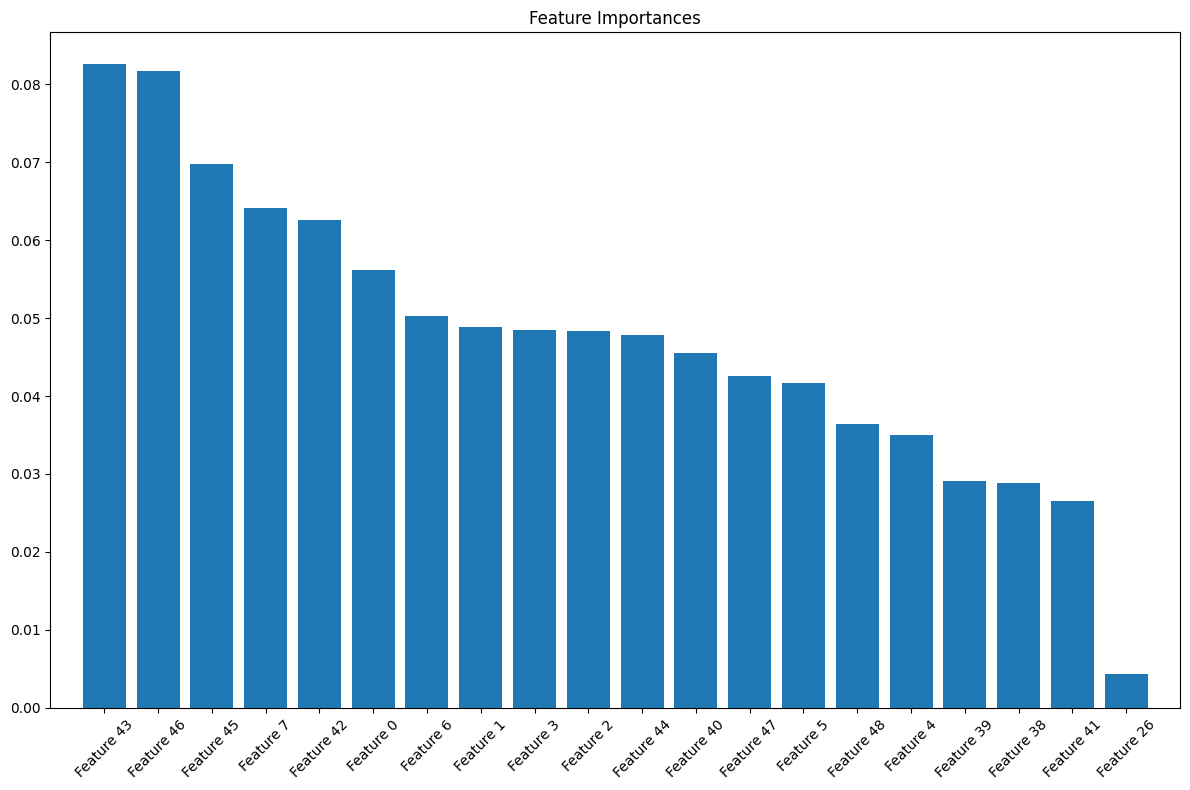


Top 10 most important features:
1. Feature 43: 0.0826
2. Feature 46: 0.0817
3. Feature 45: 0.0698
4. Feature 7: 0.0641
5. Feature 42: 0.0626
6. Feature 0: 0.0562
7. Feature 6: 0.0503
8. Feature 1: 0.0489
9. Feature 3: 0.0485
10. Feature 2: 0.0484


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest on the combined features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_combined, y_train_enc)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Get feature names (simplified version)
feature_names = [f"Feature {i}" for i in range(X_train_combined.shape[1])]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=45)
plt.xlim([-1, 20])
plt.tight_layout()
plt.show()

# Print top 10 features
print("\nTop 10 most important features:")
for i in range(10):
    print(f"{i+1}. Feature {indices[i]}: {importances[indices[i]]:.4f}")

#Brain Tumor Image Retrieval System


Recherche par image entière

Please upload the query image:


Saving 11 no.jpg to 11 no (1).jpg


Calculating distances:   0%|          | 0/253 [00:00<?, ?it/s]

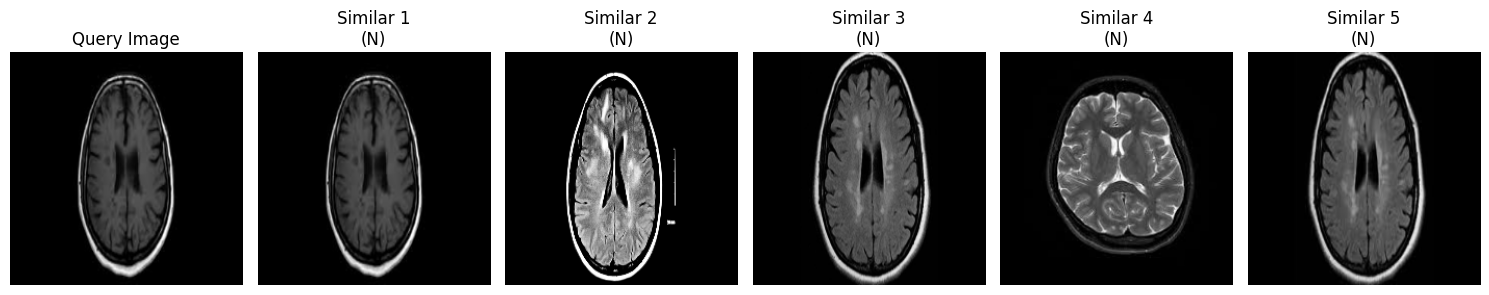


Top 5 similar images (by Euclidean distance):
1. Image index: 211, Label: N
2. Image index: 180, Label: N
3. Image index: 208, Label: N
4. Image index: 246, Label: N
5. Image index: 165, Label: N


In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(img1, img2):
    """Calculates the Euclidean distance between two images."""
    return np.sqrt(np.sum((img1 - img2)**2))

# Upload query image
print("Please upload the query image:")
uploaded = files.upload()

query_img_path = list(uploaded.keys())[0]
query_img = cv2.imread(query_img_path)

if query_img is None:
    print("Error: Could not read the uploaded image.")
else:
    # Resize query image to match dataset image size (224x224)
    query_img_resized = cv2.resize(query_img, (224, 224))

    # Convert to RGB for consistent comparison with dataset images
    query_img_rgb = cv2.cvtColor(query_img_resized, cv2.COLOR_BGR2RGB)

    # Calculate distances to all images in the dataset
    distances = {}
    for i in tqdm(range(len(X)), desc="Calculating distances"):
        dist = euclidean_distance(query_img_rgb, X[i])
        distances[i] = dist

    # Sort distances and get top 5 similar images
    sorted_distances = sorted(distances.items(), key=lambda item: item[1])
    top_5_indices = [item[0] for item in sorted_distances[:5]]

    # Display query image and top 5 similar images
    plt.figure(figsize=(15, 8))

    # Display query image
    plt.subplot(1, 6, 1)
    plt.imshow(query_img_rgb)
    plt.title("Query Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(top_5_indices):
        plt.subplot(1, 6, i + 2)
        plt.imshow(X[idx])
        plt.title(f"Similar {i+1}\n({y[idx]})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\nTop 5 similar images (by Euclidean distance):")
    for i, idx in enumerate(top_5_indices):
        # Assuming you have a list of original filenames or identifiers
        # For now, we'll just use the index and label
        print(f"{i+1}. Image index: {idx}, Label: {y[idx]}")

**Recherche par Couleur**

Extracting color features for the dataset...


Extracting features:   0%|          | 0/253 [00:00<?, ?it/s]

Feature extraction completed.

Please upload the query image for color-based retrieval:


Saving 11 no.jpg to 11 no (2).jpg


Calculating distances:   0%|          | 0/253 [00:00<?, ?it/s]

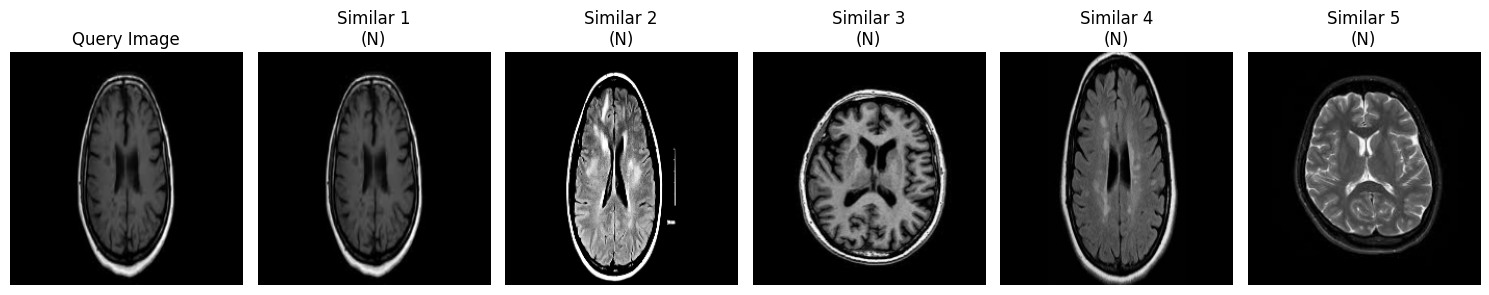


Top 5 similar images (by color features):
1. Image index: 211, Label: N
2. Image index: 180, Label: N
3. Image index: 215, Label: N
4. Image index: 208, Label: N
5. Image index: 246, Label: N


In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming color_Moments function is defined in a previous cell and works correctly
# def color_Moments(img):
#     """
#     Extracts color features from an image.

#     Args:
#         img: Input image in RGB format

#     Returns:
#         Array of color features (mean and std for R, G, B channels)
#     """
#     R, G, B = img[...,0].astype(np.float32), img[...,1].astype(np.float32), img[...,2].astype(np.float32)
#     feats = np.array([R.mean(), R.std(), G.mean(), G.std(), B.mean(), B.std()], dtype=np.float32)
#     return feats / (np.mean(np.abs(feats)) + 1e-8)  # Normalize features


def getFeatures(img, feature_type="color"):
    """
    Extracts features from an image based on the specified type.

    Args:
        img: Input image in RGB format
        feature_type: Type of feature to extract ('color')

    Returns:
        Array of extracted features
    """
    if feature_type == "color":
        return color_Moments(img)
    else:
        return None # Add other feature types later

def euclidean_distance(feat1, feat2):
    """Calculates the Euclidean distance between two feature vectors."""
    return np.sqrt(np.sum((feat1 - feat2)**2))


# Extract color features for the entire dataset
print("Extracting color features for the dataset...")
dataset_color_features = np.array([getFeatures(im, feature_type="color") for im in tqdm(X, desc="Extracting features")])
print("Feature extraction completed.")


# Upload query image
print("\nPlease upload the query image for color-based retrieval:")
uploaded = files.upload()

query_img_path = list(uploaded.keys())[0]
query_img = cv2.imread(query_img_path)

if query_img is None:
    print("Error: Could not read the uploaded image.")
else:
    # Resize query image to match dataset image size (224x224)
    query_img_resized = cv2.resize(query_img, (224, 224))

    # Convert to RGB for consistent comparison with dataset images
    query_img_rgb = cv2.cvtColor(query_img_resized, cv2.COLOR_BGR2RGB)

    # Extract color features from the query image
    query_color_features = getFeatures(query_img_rgb, feature_type="color")

    # Calculate distances between query features and dataset features
    distances = {}
    for i in tqdm(range(len(dataset_color_features)), desc="Calculating distances"):
        dist = euclidean_distance(query_color_features, dataset_color_features[i])
        distances[i] = dist

    # Sort distances and get top 5 similar images
    sorted_distances = sorted(distances.items(), key=lambda item: item[1])
    top_5_indices = [item[0] for item in sorted_distances[:5]]

    # Display query image and top 5 similar images
    plt.figure(figsize=(15, 8))

    # Display query image
    plt.subplot(1, 6, 1)
    plt.imshow(query_img_rgb)
    plt.title("Query Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(top_5_indices):
        plt.subplot(1, 6, i + 2)
        plt.imshow(X[idx])
        plt.title(f"Similar {i+1}\n({y[idx]})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\nTop 5 similar images (by color features):")
    for i, idx in enumerate(top_5_indices):
        # Assuming you have a list of original filenames or identifiers
        # For now, we'll just use the index and label
        print(f"{i+1}. Image index: {idx}, Label: {y[idx]}")

Recherche par Histogramme

Extracting HSV histogram features for the dataset...


Extracting features:   0%|          | 0/253 [00:00<?, ?it/s]

Feature extraction completed.

Please upload the query image for HSV histogram-based retrieval:


Saving 11 no.jpg to 11 no (3).jpg


Calculating distances:   0%|          | 0/253 [00:00<?, ?it/s]

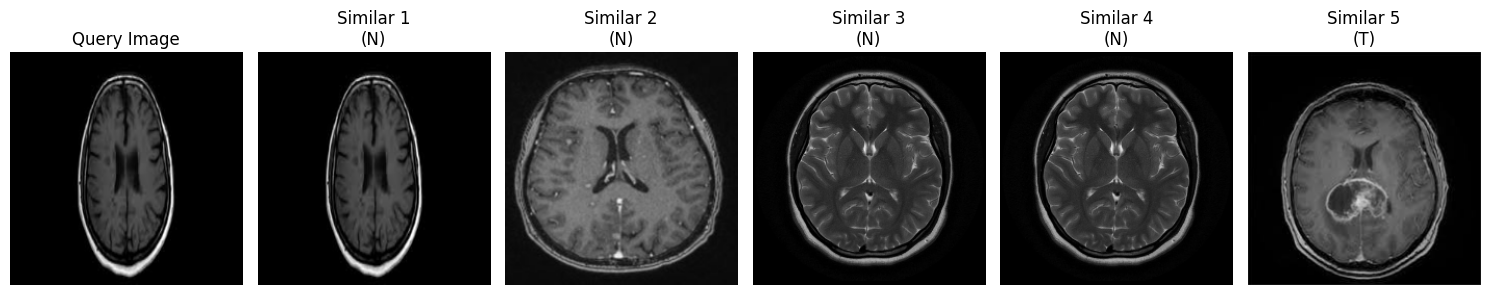


Top 5 similar images (by HSV histogram features):
1. Image index: 211, Label: N
2. Image index: 241, Label: N
3. Image index: 158, Label: N
4. Image index: 160, Label: N
5. Image index: 31, Label: T


In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming color_Moments and hsvHistogramFeatures functions are defined and work correctly

def getFeatures(img, feature_type="color"):
    """
    Extracts features from an image based on the specified type.

    Args:
        img: Input image in RGB format
        feature_type: Type of feature to extract ('color', 'hsv_histogram')

    Returns:
        Array of extracted features
    """
    if feature_type == "color":
        return color_Moments(img)
    elif feature_type == "hsv_histogram":
        return hsvHistogramFeatures(img)
    else:
        return None # Add other feature types later

def euclidean_distance(feat1, feat2):
    """Calculates the Euclidean distance between two feature vectors."""
    return np.sqrt(np.sum((feat1 - feat2)**2))


# Extract HSV histogram features for the entire dataset
print("Extracting HSV histogram features for the dataset...")
dataset_hsv_features = np.array([getFeatures(im, feature_type="hsv_histogram") for im in tqdm(X, desc="Extracting features")])
print("Feature extraction completed.")


# Upload query image
print("\nPlease upload the query image for HSV histogram-based retrieval:")
uploaded = files.upload()

query_img_path = list(uploaded.keys())[0]
query_img = cv2.imread(query_img_path)

if query_img is None:
    print("Error: Could not read the uploaded image.")
else:
    # Resize query image to match dataset image size (224x224)
    query_img_resized = cv2.resize(query_img, (224, 224))

    # Convert to RGB for consistent comparison with dataset images
    query_img_rgb = cv2.cvtColor(query_img_resized, cv2.COLOR_BGR2RGB)

    # Extract HSV histogram features from the query image
    query_hsv_features = getFeatures(query_img_rgb, feature_type="hsv_histogram")

    # Calculate distances between query features and dataset features
    distances = {}
    for i in tqdm(range(len(dataset_hsv_features)), desc="Calculating distances"):
        dist = euclidean_distance(query_hsv_features, dataset_hsv_features[i])
        distances[i] = dist

    # Sort distances and get top 5 similar images
    sorted_distances = sorted(distances.items(), key=lambda item: item[1])
    top_5_indices = [item[0] for item in sorted_distances[:5]]

    # Display query image and top 5 similar images
    plt.figure(figsize=(15, 8))

    # Display query image
    plt.subplot(1, 6, 1)
    plt.imshow(query_img_rgb)
    plt.title("Query Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(top_5_indices):
        plt.subplot(1, 6, i + 2)
        plt.imshow(X[idx])
        plt.title(f"Similar {i+1}\n({y[idx]})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\nTop 5 similar images (by HSV histogram features):")
    for i, idx in enumerate(top_5_indices):
        # Assuming you have a list of original filenames or identifiers
        # For now, we'll just use the index and label
        print(f"{i+1}. Image index: {idx}, Label: {y[idx]}")


Recherche par texture

Extracting texture features for the dataset...


Extracting features:   0%|          | 0/253 [00:00<?, ?it/s]

Feature extraction completed.

Please upload the query image for texture-based retrieval:


Saving 11 no.jpg to 11 no (4).jpg


Calculating distances:   0%|          | 0/253 [00:00<?, ?it/s]

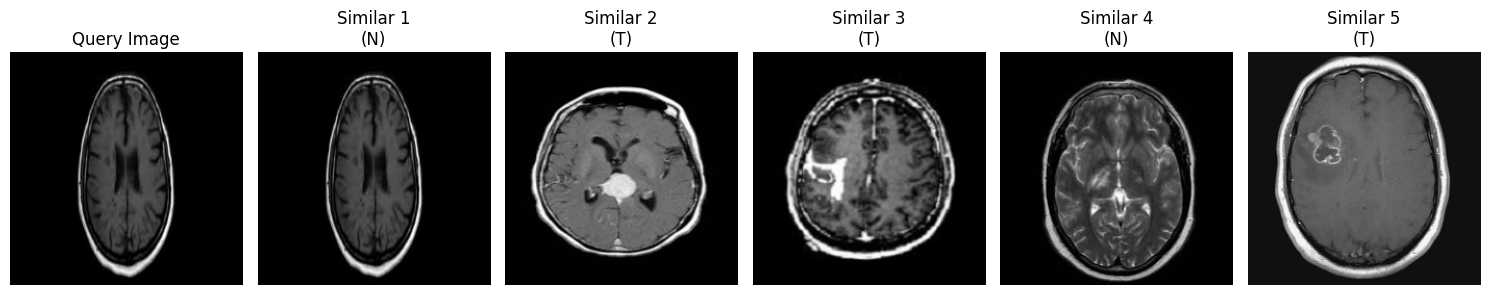


Top 5 similar images (by texture features):
1. Image index: 211, Label: N
2. Image index: 16, Label: T
3. Image index: 98, Label: T
4. Image index: 196, Label: N
5. Image index: 113, Label: T


In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming color_Moments, hsvHistogramFeatures, and textureFeatures functions are defined and work correctly

def getFeatures(img, feature_type="color"):
    """
    Extracts features from an image based on the specified type.

    Args:
        img: Input image in RGB format
        feature_type: Type of feature to extract ('color', 'hsv_histogram', 'texture')

    Returns:
        Array of extracted features
    """
    if feature_type == "color":
        return color_Moments(img)
    elif feature_type == "hsv_histogram":
        return hsvHistogramFeatures(img)
    elif feature_type == "texture":
        return textureFeatures(img)
    else:
        return None # Add other feature types later

def euclidean_distance(feat1, feat2):
    """Calculates the Euclidean distance between two feature vectors."""
    return np.sqrt(np.sum((feat1 - feat2)**2))


# Extract texture features for the entire dataset
print("Extracting texture features for the dataset...")
dataset_texture_features = np.array([getFeatures(im, feature_type="texture") for im in tqdm(X, desc="Extracting features")])
print("Feature extraction completed.")


# Upload query image
print("\nPlease upload the query image for texture-based retrieval:")
uploaded = files.upload()

query_img_path = list(uploaded.keys())[0]
query_img = cv2.imread(query_img_path)

if query_img is None:
    print("Error: Could not read the uploaded image.")
else:
    # Resize query image to match dataset image size (224x224)
    query_img_resized = cv2.resize(query_img, (224, 224))

    # Convert to RGB for consistent comparison with dataset images
    query_img_rgb = cv2.cvtColor(query_img_resized, cv2.COLOR_BGR2RGB)

    # Extract texture features from the query image
    query_texture_features = getFeatures(query_img_rgb, feature_type="texture")

    # Calculate distances between query features and dataset features
    distances = {}
    for i in tqdm(range(len(dataset_texture_features)), desc="Calculating distances"):
        dist = euclidean_distance(query_texture_features, dataset_texture_features[i])
        distances[i] = dist

    # Sort distances and get top 5 similar images
    sorted_distances = sorted(distances.items(), key=lambda item: item[1])
    top_5_indices = [item[0] for item in sorted_distances[:5]]

    # Display query image and top 5 similar images
    plt.figure(figsize=(15, 8))

    # Display query image
    plt.subplot(1, 6, 1)
    plt.imshow(query_img_rgb)
    plt.title("Query Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(top_5_indices):
        plt.subplot(1, 6, i + 2)
        plt.imshow(X[idx])
        plt.title(f"Similar {i+1}\n({y[idx]})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\nTop 5 similar images (by texture features):")
    for i, idx in enumerate(top_5_indices):
        # Assuming you have a list of original filenames or identifiers
        # For now, we'll just use the index and label
        print(f"{i+1}. Image index: {idx}, Label: {y[idx]}")

Recherche par Forme

Extracting shape features for the dataset...


Extracting features:   0%|          | 0/253 [00:00<?, ?it/s]

Feature extraction completed.

Please upload the query image for shape-based retrieval:


Saving 11 no.jpg to 11 no (5).jpg


Calculating distances:   0%|          | 0/253 [00:00<?, ?it/s]

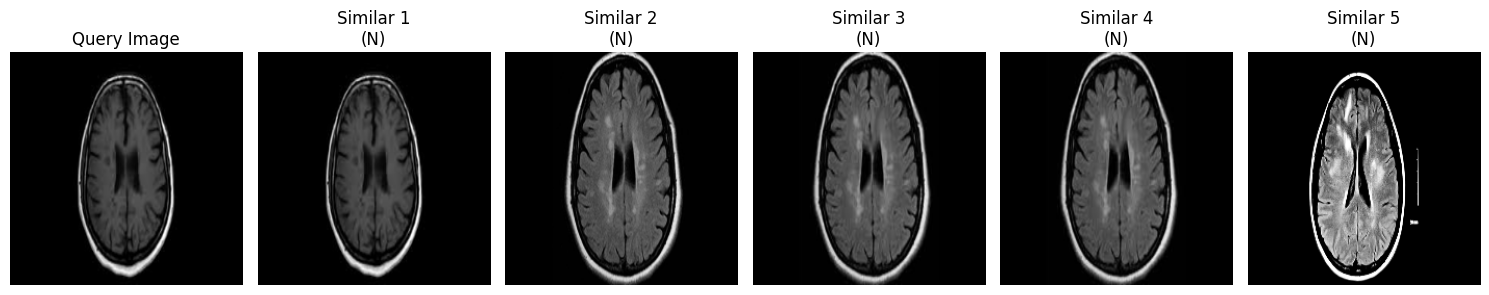


Top 5 similar images (by shape features):
1. Image index: 211, Label: N
2. Image index: 208, Label: N
3. Image index: 165, Label: N
4. Image index: 236, Label: N
5. Image index: 180, Label: N


In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming color_Moments, hsvHistogramFeatures, textureFeatures, and shapeFeatures functions are defined and work correctly

def getFeatures(img, feature_type="color"):
    """
    Extracts features from an image based on the specified type.

    Args:
        img: Input image in RGB format
        feature_type: Type of feature to extract ('color', 'hsv_histogram', 'texture', 'shape')

    Returns:
        Array of extracted features
    """
    if feature_type == "color":
        return color_Moments(img)
    elif feature_type == "hsv_histogram":
        return hsvHistogramFeatures(img)
    elif feature_type == "texture":
        return textureFeatures(img)
    elif feature_type == "shape":
        return shapeFeatures(img)
    else:
        return None # Add other feature types later

def euclidean_distance(feat1, feat2):
    """Calculates the Euclidean distance between two feature vectors."""
    return np.sqrt(np.sum((feat1 - feat2)**2))


# Extract shape features for the entire dataset
print("Extracting shape features for the dataset...")
dataset_shape_features = np.array([getFeatures(im, feature_type="shape") for im in tqdm(X, desc="Extracting features")])
print("Feature extraction completed.")


# Upload query image
print("\nPlease upload the query image for shape-based retrieval:")
uploaded = files.upload()

query_img_path = list(uploaded.keys())[0]
query_img = cv2.imread(query_img_path)

if query_img is None:
    print("Error: Could not read the uploaded image.")
else:
    # Resize query image to match dataset image size (224x224)
    query_img_resized = cv2.resize(query_img, (224, 224))

    # Convert to RGB for consistent comparison with dataset images
    query_img_rgb = cv2.cvtColor(query_img_resized, cv2.COLOR_BGR2RGB)

    # Extract shape features from the query image
    query_shape_features = getFeatures(query_img_rgb, feature_type="shape")

    # Calculate distances between query features and dataset features
    distances = {}
    for i in tqdm(range(len(dataset_shape_features)), desc="Calculating distances"):
        dist = euclidean_distance(query_shape_features, dataset_shape_features[i])
        distances[i] = dist

    # Sort distances and get top 5 similar images
    sorted_distances = sorted(distances.items(), key=lambda item: item[1])
    top_5_indices = [item[0] for item in sorted_distances[:5]]

    # Display query image and top 5 similar images
    plt.figure(figsize=(15, 8))

    # Display query image
    plt.subplot(1, 6, 1)
    plt.imshow(query_img_rgb)
    plt.title("Query Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(top_5_indices):
        plt.subplot(1, 6, i + 2)
        plt.imshow(X[idx])
        plt.title(f"Similar {i+1}\n({y[idx]})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\nTop 5 similar images (by shape features):")
    for i, idx in enumerate(top_5_indices):
        # Assuming you have a list of original filenames or identifiers
        # For now, we'll just use the index and label
        print(f"{i+1}. Image index: {idx}, Label: {y[idx]}")

recherche combiné

Extracting combined features for the dataset (without SIFT)...


Extracting features:   0%|          | 0/253 [00:00<?, ?it/s]

Combined feature extraction completed.

Please upload the query image for combined feature-based retrieval (without SIFT):


Saving 11 no.jpg to 11 no (6).jpg

Performing retrieval using Combined Features...


Calculating distances:   0%|          | 0/253 [00:00<?, ?it/s]

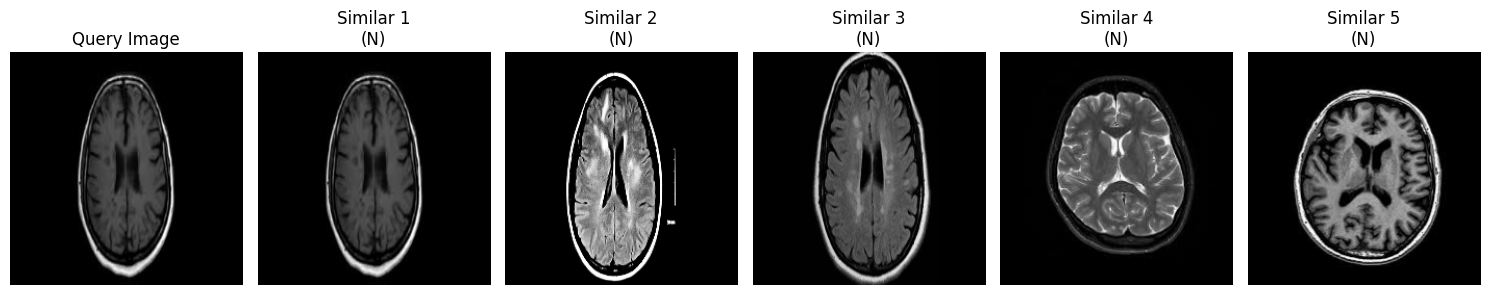


Top 5 similar images (by Combined Features):
1. Image index: 211, Label: N
2. Image index: 180, Label: N
3. Image index: 208, Label: N
4. Image index: 246, Label: N
5. Image index: 215, Label: N

Extracting combined features for the dataset (with SIFT)...


Extracting features:   0%|          | 0/253 [00:00<?, ?it/s]

Combined + SIFT feature extraction completed.

Please upload the query image for combined + SIFT feature-based retrieval:


Saving 11 no.jpg to 11 no (7).jpg

Performing retrieval using Combined Features with SIFT...


Calculating distances:   0%|          | 0/253 [00:00<?, ?it/s]

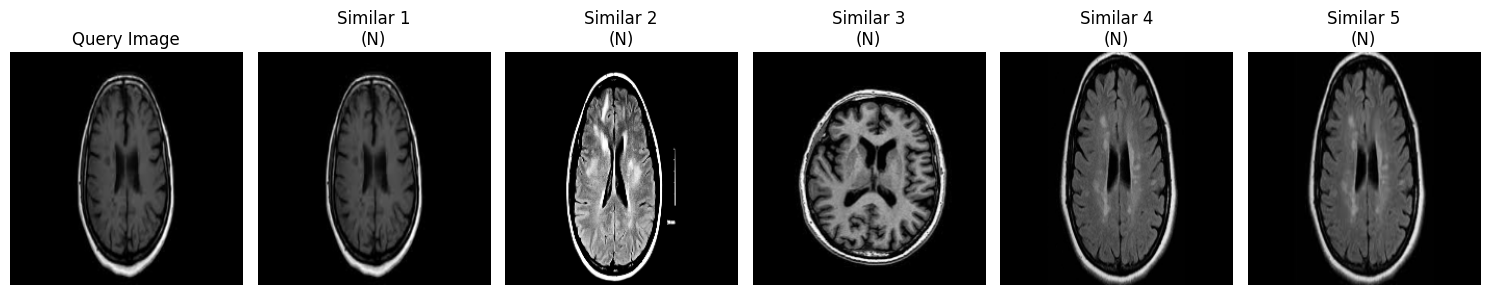


Top 5 similar images (by Combined Features with SIFT):
1. Image index: 211, Label: N
2. Image index: 180, Label: N
3. Image index: 215, Label: N
4. Image index: 208, Label: N
5. Image index: 165, Label: N


In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Assuming KMeans is needed for SIFT

# Assuming color_Moments, hsvHistogramFeatures, textureFeatures, shapeFeatures,
# extractSIFTDescriptors, buildVocabulary, computeBoVWHistogram,
# combinedFeatures, and combinedFeaturesWithSIFT functions are defined and work correctly

# Build SIFT vocabulary if not already built
if 'kmeans' not in globals():
    print("Building SIFT vocabulary for combined features with SIFT...")
    sift_descriptors = [extractSIFTDescriptors(im) for im in X]
    # Filter out None descriptors before building vocabulary
    valid_descriptors = [d for d in sift_descriptors if d is not None and d.shape[0] > 0]
    if valid_descriptors:
        kmeans = buildVocabulary(valid_descriptors, n_clusters=50)
        print("SIFT vocabulary built.")
    else:
        print("No valid SIFT descriptors found to build vocabulary.")
        kmeans = None # Set kmeans to None if no descriptors are found


def getFeatures(img, feature_type="color"):
    """
    Extracts features from an image based on the specified type.

    Args:
        img: Input image in RGB format
        feature_type: Type of feature to extract ('color', 'hsv_histogram', 'texture', 'shape', 'combined', 'combined_sift')

    Returns:
        Array of extracted features
    """
    if feature_type == "color":
        return color_Moments(img)
    elif feature_type == "hsv_histogram":
        return hsvHistogramFeatures(img)
    elif feature_type == "texture":
        return textureFeatures(img)
    elif feature_type == "shape":
        return shapeFeatures(img)
    elif feature_type == "combined":
        return combinedFeatures(img)
    elif feature_type == "combined_sift" and kmeans is not None:
        return combinedFeaturesWithSIFT(img, kmeans)
    else:
        return None # Add other feature types later

def euclidean_distance(feat1, feat2):
    """Calculates the Euclidean distance between two feature vectors."""
    return np.sqrt(np.sum((feat1 - feat2)**2))

def perform_retrieval(dataset_features, query_features, dataset_labels, feature_name):
    """Performs image retrieval and displays results."""
    print(f"\nPerforming retrieval using {feature_name}...")
    distances = {}
    for i in tqdm(range(len(dataset_features)), desc="Calculating distances"):
        dist = euclidean_distance(query_features, dataset_features[i])
        distances[i] = dist

    # Sort distances and get top 5 similar images
    sorted_distances = sorted(distances.items(), key=lambda item: item[1])
    top_5_indices = [item[0] for item in sorted_distances[:5]]

    # Display query image and top 5 similar images
    plt.figure(figsize=(15, 8))

    # Display query image
    plt.subplot(1, 6, 1)
    # Assuming query_img_rgb is available from the upload step
    plt.imshow(query_img_rgb)
    plt.title("Query Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(top_5_indices):
        plt.subplot(1, 6, i + 2)
        plt.imshow(X[idx])
        plt.title(f"Similar {i+1}\n({dataset_labels[idx]})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"\nTop 5 similar images (by {feature_name}):")
    for i, idx in enumerate(top_5_indices):
        print(f"{i+1}. Image index: {idx}, Label: {dataset_labels[idx]}")


# --- Retrieval with Combined Features (without SIFT) ---

# Extract combined features for the entire dataset
print("Extracting combined features for the dataset (without SIFT)...")
dataset_combined_features = np.array([getFeatures(im, feature_type="combined") for im in tqdm(X, desc="Extracting features")])
print("Combined feature extraction completed.")

# Upload query image for combined feature retrieval
print("\nPlease upload the query image for combined feature-based retrieval (without SIFT):")
uploaded = files.upload()

query_img_path = list(uploaded.keys())[0]
query_img = cv2.imread(query_img_path)

if query_img is None:
    print("Error: Could not read the uploaded image.")
else:
    # Resize query image to match dataset image size (224x224)
    query_img_resized = cv2.resize(query_img, (224, 224))
    query_img_rgb = cv2.cvtColor(query_img_resized, cv2.COLOR_BGR2RGB) # Keep this for display

    # Extract combined features from the query image
    query_combined_features = getFeatures(query_img_rgb, feature_type="combined")

    # Perform retrieval
    perform_retrieval(dataset_combined_features, query_combined_features, y, "Combined Features")


# --- Retrieval with Combined Features (with SIFT) ---

if kmeans is not None:
    # Extract combined features with SIFT for the entire dataset
    print("\nExtracting combined features for the dataset (with SIFT)...")
    dataset_combined_sift_features = np.array([getFeatures(im, feature_type="combined_sift") for im in tqdm(X, desc="Extracting features")])
    print("Combined + SIFT feature extraction completed.")

    # Upload query image for combined + SIFT feature retrieval
    print("\nPlease upload the query image for combined + SIFT feature-based retrieval:")
    uploaded = files.upload()

    query_img_path = list(uploaded.keys())[0]
    query_img = cv2.imread(query_img_path)

    if query_img is None:
        print("Error: Could not read the uploaded image.")
    else:
        # Resize query image to match dataset image size (224x224)
        query_img_resized = cv2.resize(query_img, (224, 224))
        query_img_rgb = cv2.cvtColor(query_img_resized, cv2.COLOR_BGR2RGB) # Keep this for display

        # Extract combined + SIFT features from the query image
        query_combined_sift_features = getFeatures(query_img_rgb, feature_type="combined_sift")

        # Perform retrieval
        perform_retrieval(dataset_combined_sift_features, query_combined_sift_features, y, "Combined Features with SIFT")
else:
    print("\nSkipping Combined + SIFT retrieval as SIFT vocabulary could not be built.")


--- Testing SIFT Robustness ---

Please upload the query image for the SIFT robustness test:


Saving 11 no.jpg to 11 no (8).jpg

Applied 30 degree rotation to the query image.


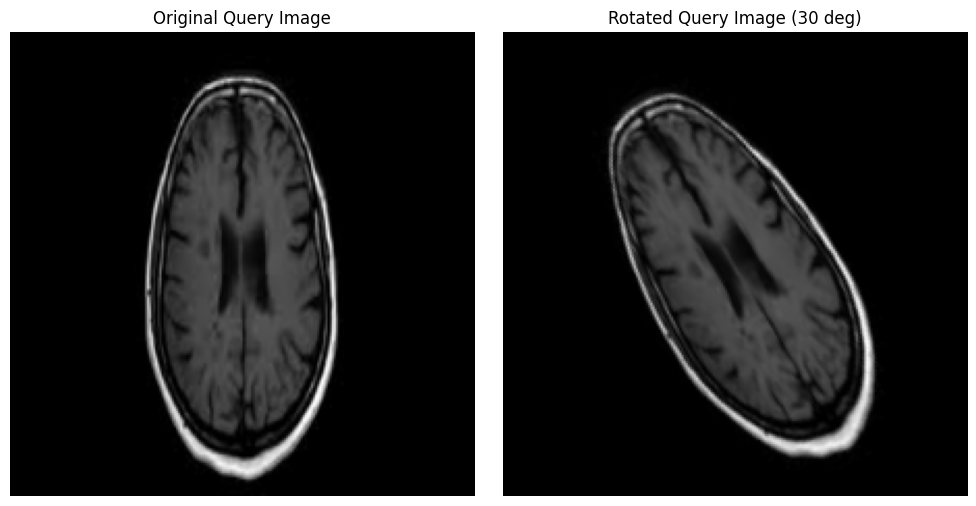


Performing retrieval using Combined Features with SIFT (on transformed image)...


Calculating distances:   0%|          | 0/253 [00:00<?, ?it/s]

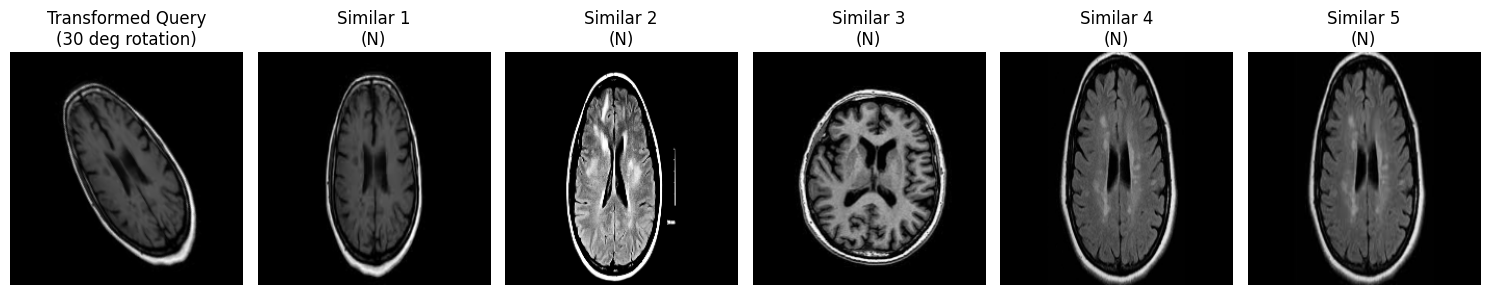


Top 5 similar images (by Combined Features with SIFT on transformed image):
1. Image index: 211, Label: N
2. Image index: 180, Label: N
3. Image index: 215, Label: N
4. Image index: 208, Label: N
5. Image index: 165, Label: N


In [ ]:
# --- Test SIFT Robustness with Rotation or Translation ---

if kmeans is not None:
    print("\n--- Testing SIFT Robustness ---")

    # Upload query image again for robustness test
    print("\nPlease upload the query image for the SIFT robustness test:")
    uploaded = files.upload()

    query_img_path = list(uploaded.keys())[0]
    query_img = cv2.imread(query_img_path)

    if query_img is None:
        print("Error: Could not read the uploaded image.")
    else:
        # Resize query image to match dataset image size (224x224)
        query_img_resized = cv2.resize(query_img, (224, 224))
        query_img_rgb = cv2.cvtColor(query_img_resized, cv2.COLOR_BGR2RGB)

        # --- Apply a transformation (e.g., Rotation) ---
        # You can change the angle or use translation instead
        angle = 30 # degrees
        (h, w) = query_img_resized.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        query_img_transformed = cv2.warpAffine(query_img_resized, M, (w, h))
        query_img_transformed_rgb = cv2.cvtColor(query_img_transformed, cv2.COLOR_BGR2RGB)

        print(f"\nApplied {angle} degree rotation to the query image.")

        # Display original and transformed query images
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(query_img_rgb)
        axes[0].set_title('Original Query Image')
        axes[0].axis('off')
        axes[1].imshow(query_img_transformed_rgb)
        axes[1].set_title(f'Rotated Query Image ({angle} deg)')
        axes[1].axis('off')
        plt.tight_layout()
        plt.show()


        # Extract combined features with SIFT from the transformed image
        query_combined_sift_transformed_features = getFeatures(query_img_transformed_rgb, feature_type="combined_sift")

        # Perform retrieval using features from the transformed image
        print("\nPerforming retrieval using Combined Features with SIFT (on transformed image)...")
        distances_transformed = {}
        for i in tqdm(range(len(dataset_combined_sift_features)), desc="Calculating distances"):
            dist = euclidean_distance(query_combined_sift_transformed_features, dataset_combined_sift_features[i])
            distances_transformed[i] = dist

        # Sort distances and get top 5 similar images
        sorted_distances_transformed = sorted(distances_transformed.items(), key=lambda item: item[1])
        top_5_indices_transformed = [item[0] for item in sorted_distances_transformed[:5]]

        # Display transformed query image and top 5 similar images
        plt.figure(figsize=(15, 8))

        # Display transformed query image
        plt.subplot(1, 6, 1)
        plt.imshow(query_img_transformed_rgb)
        plt.title(f"Transformed Query\n({angle} deg rotation)")
        plt.axis('off')

        # Display similar images
        for i, idx in enumerate(top_5_indices_transformed):
            plt.subplot(1, 6, i + 2)
            plt.imshow(X[idx])
            plt.title(f"Similar {i+1}\n({y[idx]})")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

        print(f"\nTop 5 similar images (by Combined Features with SIFT on transformed image):")
        for i, idx in enumerate(top_5_indices_transformed):
            print(f"{i+1}. Image index: {idx}, Label: {y[idx]}")

else:
    print("\nSkipping SIFT robustness test as SIFT vocabulary could not be built.")